In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [2]:
training_data = pd.read_csv('FB_training_data.csv')

In [3]:
training_data = training_data.iloc[:, 1].values

In [4]:
scaler = MinMaxScaler()

In [5]:
# 1D training_data in coverted to 2D and values are scaled between 0 and 1
training_data = scaler.fit_transform(training_data.reshape(-1, 1))

In [6]:
x_training_data = []
y_training_data =[]

In [7]:
# len of training data = 1258, here for X and y train 1218 data is taken for training
for i in range(40, len(training_data)):
    x_training_data.append(training_data[i-40:i, 0])
    y_training_data.append(training_data[i, 0])

In [8]:
# Here list type is changed into numpy array
x_training_data = np.array(x_training_data)
y_training_data = np.array(y_training_data)

In [9]:
# By reshaping training data is converted from 2D to 3D
x_training_data = np.reshape(x_training_data, (x_training_data.shape[0], 
                                               x_training_data.shape[1], 
                                               1))

In [10]:
# Building RNN starts from here
rnn = Sequential()

In [11]:
# LSTM layer
rnn.add(LSTM(units = 45, return_sequences = True, input_shape = (x_training_data.shape[1], 1), activation='tanh'))
rnn.add(Dropout(0.2))
rnn.add(LSTM(units = 45, return_sequences = True, activation='tanh'))
rnn.add(Dropout(0.2))
rnn.add(LSTM(units = 45, return_sequences = True, activation='tanh'))
rnn.add(Dropout(0.2))
rnn.add(LSTM(units = 45))
rnn.add(Dropout(0.2))

In [12]:
# Output layer
rnn.add(Dense(units=1))

In [13]:
# Compiling Our RNN
rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [14]:
# Fitting RNN on training set
rnn.fit(x_training_data, y_training_data, epochs = 100, batch_size = 32)

Epoch 1/100
39/39 [==============================] - 10s 40ms/step - loss: 0.0464
Epoch 2/100
39/39 [==============================] - 1s 37ms/step - loss: 0.0072
Epoch 3/100
39/39 [==============================] - 1s 36ms/step - loss: 0.0067
Epoch 4/100
39/39 [==============================] - 1s 35ms/step - loss: 0.0063
Epoch 5/100
39/39 [==============================] - 1s 34ms/step - loss: 0.0059
Epoch 6/100
39/39 [==============================] - 1s 34ms/step - loss: 0.0053
Epoch 7/100
39/39 [==============================] - 1s 33ms/step - loss: 0.0052
Epoch 8/100
39/39 [==============================] - 1s 38ms/step - loss: 0.0051
Epoch 9/100
39/39 [==============================] - 2s 39ms/step - loss: 0.0061
Epoch 10/100
39/39 [==============================] - 1s 34ms/step - loss: 0.0050
Epoch 11/100
39/39 [==============================] - 1s 37ms/step - loss: 0.0056
Epoch 12/100
39/39 [==============================] - 1s 35ms/step - loss: 0.0046
Epoch 13/100
39/39 [====

In [15]:
# Importing our test data set
test_data = pd.read_csv('FB_test_data.csv')
test_data = test_data.iloc[:, 1].values

In [16]:
# Since we need 40 data for prediction but test data has 21 values, so we will concat train and test data to get 40 values

unscaled_training_data = pd.read_csv('FB_training_data.csv')
unscaled_test_data = pd.read_csv('FB_test_data.csv')

In [17]:
# Concatination takes place
all_data = pd.concat((unscaled_training_data['Open'], unscaled_test_data['Open']), axis = 0)

In [18]:
x_test_data = all_data[len(all_data) - len(test_data) - 40:].values

In [19]:
x_test_data = np.reshape(x_test_data, (-1, 1))

In [20]:
# Scaling our test data
x_test_data = scaler.transform(x_test_data)

In [21]:
# Grouping our test data
final_x_test_data = []

In [22]:
for i in range(40, len(x_test_data)):

    final_x_test_data.append(x_test_data[i-40:i, 0])

In [23]:
final_x_test_data = np.array(final_x_test_data)

In [24]:
# Reshaping takes place
final_x_test_data = np.reshape(final_x_test_data, (final_x_test_data.shape[0],
                                               final_x_test_data.shape[1],
                                               1))

In [25]:
# Making predictions
predictions = rnn.predict(final_x_test_data)

1/1 [==============================] - 2s 2s/step


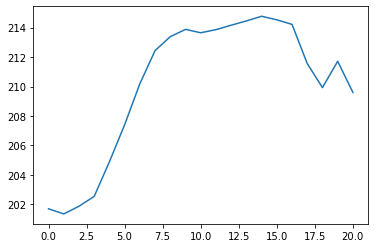

In [26]:
# Unscaling prediction
unscaled_predictions = scaler.inverse_transform(predictions)
plt.plot(unscaled_predictions)

Text(0.5, 1.0, 'Facebook Stock Price Predictions')

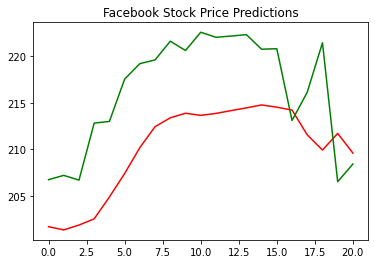

In [27]:
plt.plot(unscaled_predictions, color = 'Red', label = "Predictions")
plt.plot(test_data, color = 'Green', label = "Real Data")
plt.title('Facebook Stock Price Predictions')